In [362]:
import jieba
import jieba.analyse
import pandas as pd

### 讀取文章

In [363]:
final = ""
#filename = r"D:\cgu\課程\四年級\四上\自然語言處理\HW1\hw1-dataset.txt"
filename = r"D:\cgu\課程\四年級\四上\自然語言處理\HW1\test.txt"

### 分詞

In [364]:
string = []
string1 =[]
with open(filename,'r',encoding = 'utf-8') as f:
    for line in f.readlines():
        word = jieba.lcut(line,cut_all=False)
        string.append(word)
    #將多個一維陣列合併成一個一維陣列
    for i in string :
        for w in i :
            string1.append(w)
    print(string1)

['為', '什麼', ' ', '聖結石', ' ', '會', '被', '酸', '而', ' ', '這群', '人', ' ', '不會', '？', '\t', '質感', ' ', '劇本', ' ', '成員', ' ', '都', '差', '很多', '好', '嗎', ' ', '不要', '拿', '腎', '結石來', '污辱', '這群', '人', '\n', '為', '什麼', '慶祝', '228', '會', '被', '罵', '可是', '慶', '端午', '不會', '？', '\t', '因為', '屈原', '不是', '台灣', '人', '，', '是', '楚國人', '。', '\n', '有', '沒', '有', '戰神', '阿瑞斯', '的', '八卦', '?', '\t', '爵士', '就是', '阿瑞斯', ' ', '男主角', '最後死', '了', '\n', '理論', '與', '實務', '最', '脫節', '的', '系', '\t', '哪個', '系', '不', '脫節', '...', '你問', '最', '不', '脫節', '的', '簡單', '多', '了', '...', '\n', '為', '什麼', 'PTT', '這麼', '多', '人', '看', '棒球', '\t', '肥宅', '才', '看', '棒球', '\u3000', '系壘', '一堆', '胖子', '\n', '為', '什麼', '達摩祖', '師傳', '那麼', '好看', '?', '\t', '達摩', '從頭', '到', '尾', '都', '是', '被動', ' ', '(', '別人問', '他', '問題', '\n', '3D', '小畫家', '有人', '會畫', '嗎', '？', '\t', '3D', '小當家', '有人', '會畫', '嗎', '\n', '對', '天龍', '人來', '說', '宜蘭', '4', '南部', '還', '４', '東部', '\t', '他國', '事務', '..', '\n', '機車', '推出', 'uber', '或', '計程', '機車會', '怎樣', '\t', '載到', '

### 移除停留詞

In [365]:
new_list = []
def remove_stop_words(file_name,string1):
    with open(file_name,'r',encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
  
    for seg in string1:
        if seg not in stop_words:
            if seg == '\n':
                continue
            elif seg == '\t':
                continue
            elif seg == ' ':
                continue                
            else:
                new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

file_name = './停留詞.txt'
string1 = remove_stop_words(file_name,string1)
print('remove_stop_words: ',string1)

remove_stop_words:  ['為', '什麼', '聖結石', '會', '被', '酸', '而', '這群', '人', '不會', '質感', '劇本', '成員', '都', '差', '很多', '好', '嗎', '不要', '拿', '腎', '結石來', '污辱', '這群', '人', '為', '什麼', '慶祝', '228', '會', '被', '罵', '可是', '慶', '端午', '不會', '因為', '屈原', '不是', '台灣', '人', '是', '楚國人', '。', '沒', '戰神', '阿瑞斯', '八卦', '爵士', '就是', '阿瑞斯', '男主角', '最後死', '了', '理論', '與', '實務', '最', '脫節', '系', '哪個', '系', '不', '脫節', '你問', '最', '不', '脫節', '簡單', '多', '了', '為', '什麼', 'PTT', '這麼', '多', '人', '看', '棒球', '肥宅', '才', '看', '棒球', '\u3000', '系壘', '一堆', '胖子', '為', '什麼', '達摩祖', '師傳', '那麼', '好看', '達摩', '從頭', '到', '尾', '都', '是', '被動', '(', '別人問', '他', '問題', '3D', '小畫家', '有人', '會畫', '嗎', '3D', '小當家', '有人', '會畫', '嗎', '對', '天龍', '人來', '說', '宜蘭', '4', '南部', '還', '４', '東部', '他國', '事務', '機車', '推出', 'uber', '或', '計程', '機車會', '怎樣', '載到', '肥宅會', '很', '痛苦', '台中', '龍邦', '世貿', '有人', '跳樓', '曾經', '當過', '全台', '第一', '高樓', '可惜', '不到', '一年', '抽到', '海陸會', '被', '笑', '娘', '炮兵', '嗎', '還好', '啦', '海陸下', '基地', '常態', '下好', '下滿', '。', '國', '高中', '國文', '你', '沒',

### TF-IDF權重

In [367]:
tagWordArr = []
weightArr =[]
with open(filename,'r',encoding = 'utf-8') as f:
    for line in f.readlines():
        #topK 為返回 TF-IDF 權重最大的關鍵詞(一篇文章一個topK)
        #withWeight 代表是否返回關鍵字權重值，默認為 False
        tags = jieba.analyse.extract_tags(line, topK=1, withWeight=True)
        for tag in tags:
            #print('word:', tag[0], 'tf-idf:', tag[1])
            print(tag[0])
            print(tag[1])

這群
1.9924612504833332
什麼
1.0867970457181817
阿瑞斯
2.955309027575
脫節
3.5864302508699994
棒球
2.3737337393555555
什麼
1.19547675029
3D
2.988691875725
天龍
1.4943459378625
機車
1.3283075003222222
龍邦
0.9195975002230768
下好
1.3904870323222223
國文
1.7078239289857142
垃圾
1.5979762015880001
國歌
1.5939690003866667
筆電
1.8391950004461537
歐陽妮
1.19547675029
imgur
1.9924612504833332
搖搖筆
2.988691875725
肥宅
3.4156478579714284
006
1.3283075003222222
新加坡
1.3306640932872726
甜柿
1.467503385711111
轉筆
1.3283075003222222
手式
1.19547675029
484
3.9849225009666664
專業
2.7587925006692307
台灣
3.260391137154545
貓貓
2.988691875725
金金
2.4582479479
公車
0.9962306252416666
高醫
2.39095350058
妹妹
2.34215971884
肥宅
1.0867970457181817
磁片
3.072809934875


### 詞頻統計

In [338]:
new={}
wordArr = []
countArr =[]
#通過對程式的檢查，對程式進行完善
for word in string1:
    # 對原來的字典new中判斷是否有rword這個人，沒有就返回0，
    # 賦予rword鍵有就在原來rword所對應的值加1，並賦予rword鍵
    new[word]=new.get(word,0)+1
    
item=list(new.items())
item.sort(key=lambda x:x[1],reverse=True)
for i in range(100):
    word,count=item[i]
    wordArr.append(word)
    countArr.append(count)
    #print("{0:<10}{1:>5}".format(word,count))

### 頻率長條圖 

<BarContainer object of 100 artists>

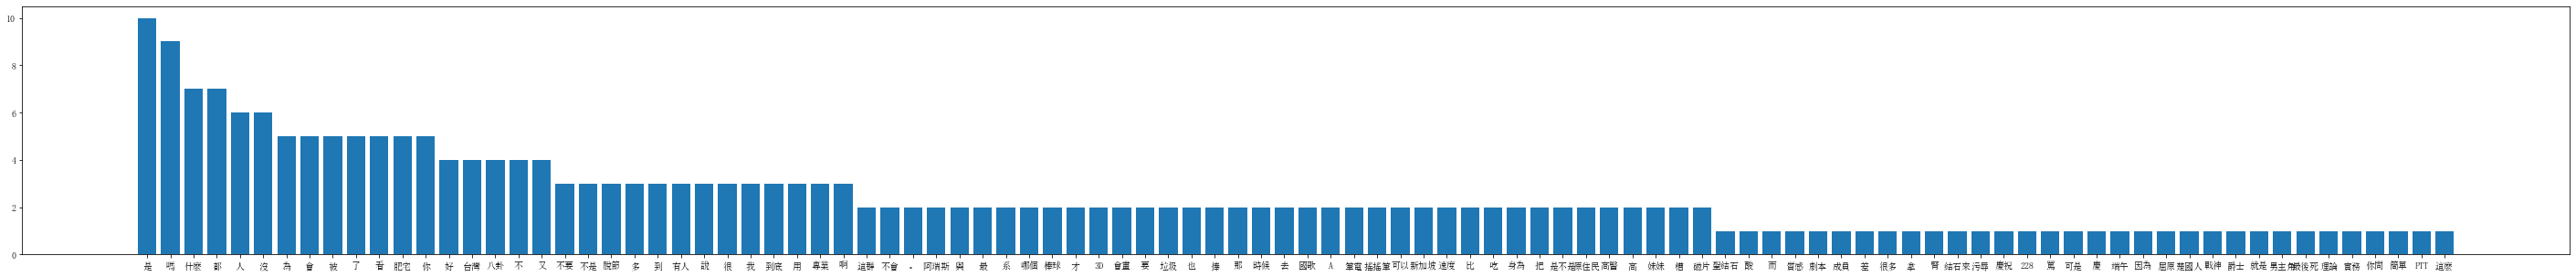

In [361]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='SimSun')
#x = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(50,5))
#plt.bar(x, countArr, label = 'wordArr')
plt.bar(wordArr, countArr, label = 'wordArr')